In [4]:
# Step 0. Load libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
# Step 1. Load the dataset
# Source: http://lib.stat.cmu.edu/datasets/boston
# The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
# prices and the demand for clean air', J. Environ. Economics & Management,
# vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
# ...', Wiley, 1980.   N.B. Various transformations are used in the table on
# pages 244-261 of the latter.
# Attribute Information (in order):
#        - CRIM     per capita crime rate by town
#        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
#        - INDUS    proportion of non-retail business acres per town
#        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#        - NOX      nitric oxides concentration (parts per 10 million)
#        - RM       average number of rooms per dwelling
#        - AGE      proportion of owner-occupied units built prior to 1940
#        - DIS      weighted distances to five Boston employment centres
#        - RAD      index of accessibility to radial highways
#        - TAX      full-value property-tax rate per $10,000
#        - PTRATIO  pupil-teacher ratio by town
#        - LSTAT    % lower status of the population
#        - MEDV     Median value of owner-occupied homes in $1000's
df_raw = pd.read_csv('/workspace/Linear-Regression-Project/data/raw/boston.csv')

In [7]:
# 1.1 Get basic info
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [8]:
# 1.2 Take a sample
df_raw.sample()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
176,0.07022,0.0,4.05,0.0,0.51,6.02,47.2,3.5549,5.0,296.0,16.6,393.23,10.11,23.2


In [9]:
# 1.3 Transform if needed
df_transform = df_raw.drop(['B'], axis=1)
df = df_transform.copy()
df


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [12]:
# Step 2. Make a basic EDA
X= df.iloc[:, :12]
y= df.iloc[:, 12]


In [14]:
# 2.1 Split the dataset so to avoid bias
X_train, X_test, y_train, y_test = train_test_split (X, y, random_state=15)

In [17]:
# 2.2 Join the train sets to ease insights
df_train = pd.concat ((X_train, y_train), axis=1)

In [18]:
# 2.3 Get basic info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 379 entries, 163 to 456
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     379 non-null    float64
 1   ZN       379 non-null    float64
 2   INDUS    379 non-null    float64
 3   CHAS     379 non-null    float64
 4   NOX      379 non-null    float64
 5   RM       379 non-null    float64
 6   AGE      379 non-null    float64
 7   DIS      379 non-null    float64
 8   RAD      379 non-null    float64
 9   TAX      379 non-null    float64
 10  PTRATIO  379 non-null    float64
 11  LSTAT    379 non-null    float64
 12  MEDV     379 non-null    float64
dtypes: float64(13)
memory usage: 41.5 KB


In [19]:
# 2.4 Take a sample
df_train.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
459,6.80117,0.0,18.10,0.0,0.713,6.081,84.4,2.7175,24.0,666.0,20.2,14.70,20.0
308,0.49298,0.0,9.90,0.0,0.544,6.635,82.5,3.3175,4.0,304.0,18.4,4.54,22.8
407,11.95110,0.0,18.10,0.0,0.659,5.608,100.0,1.2852,24.0,666.0,20.2,12.13,27.9
190,0.09068,45.0,3.44,0.0,0.437,6.951,21.5,6.4798,5.0,398.0,15.2,5.10,37.0
396,5.87205,0.0,18.10,0.0,0.693,6.405,96.0,1.6768,24.0,666.0,20.2,19.37,12.5


In [20]:
# 2.5 Describe the numerical and date variables
df_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,3.544779,11.213720,11.124828,0.060686,0.555395,6.293245,68.360950,3.751303,9.464380,407.617414,18.437203,12.584485,22.681003
std,8.843378,23.314601,6.840538,0.239069,0.116113,0.711019,28.563333,2.042150,8.592828,167.695835,2.180545,7.173761,9.209861
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.137000,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082865,0.000000,5.190000,0.000000,0.451000,5.895500,43.000000,2.100350,4.000000,279.500000,17.350000,6.885000,17.150000
50%,0.269380,0.000000,9.690000,0.000000,0.538000,6.249000,77.300000,3.215700,5.000000,330.000000,19.000000,11.220000,21.200000
75%,3.621175,12.500000,18.100000,0.000000,0.624000,6.630000,94.100000,5.108550,24.000000,666.000000,20.200000,17.130000,25.750000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [ ]:
# 2.6 Describe the categorical variables


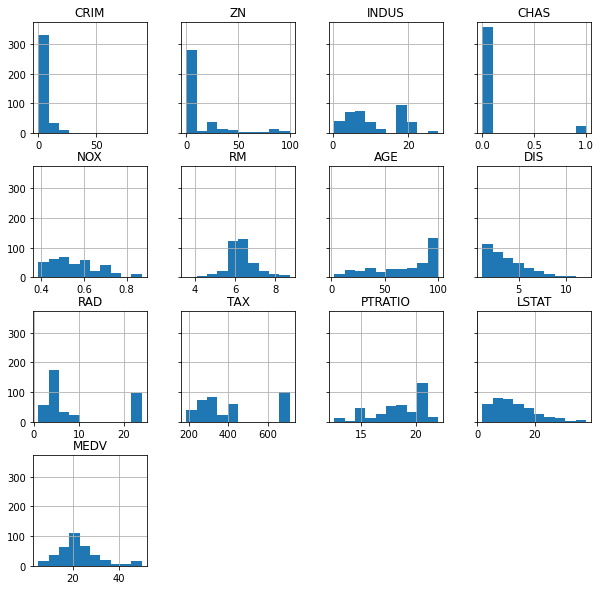

In [25]:
# 2.7 Perform univariate analysis - histograms
df_train.hist(figsize=(10,10), sharey=True)
plt.show()

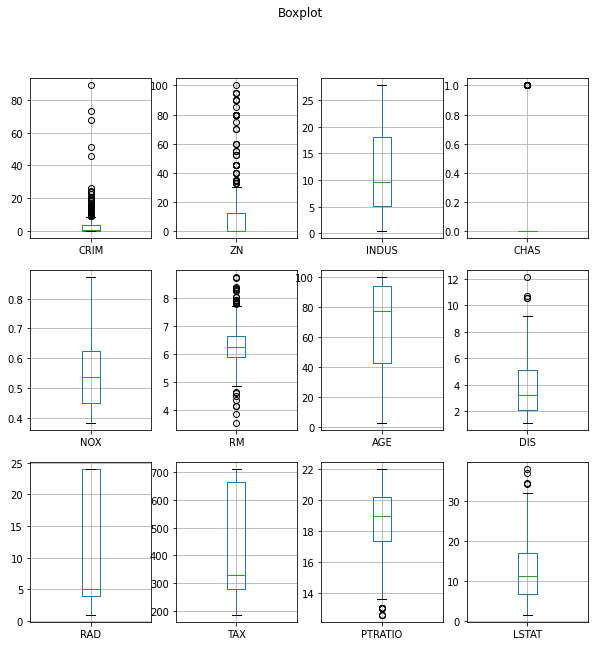

In [30]:
# 2.8 Perform univariate analysis - boxplots
fig, ax=plt.subplots(3,4,figsize=(10,10))
axs=ax.flatten()
for i in range(12):
  X_train.iloc[:,i].to_frame().boxplot(ax=axs[i])
plt.suptitle('Boxplot')
plt.show()

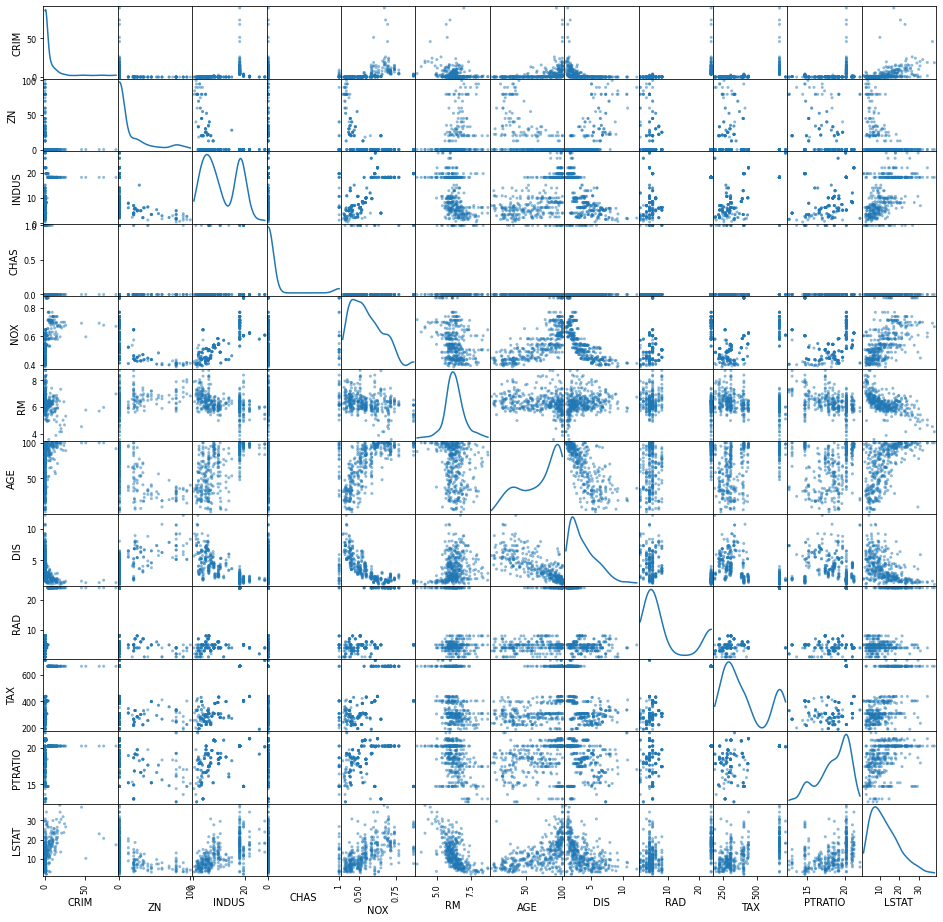

In [32]:
# 2.9 Perform bivariate analysis - scatter matrix
pd.plotting.scatter_matrix(X_train, diagonal='kde', figsize=(16,16))
plt.show()

In [39]:
# 2.10 Perform correlation analysis - Pearson or Point Biserial
abs(X_train.corr()).style.background_gradient(cmap='Reds')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
CRIM,1.000000,0.188933,0.388754,0.054388,0.394030,0.208402,0.339450,0.364491,0.602405,0.555515,0.273193,0.431456
ZN,0.188933,1.000000,0.530024,0.022742,0.513210,0.308893,0.552593,0.661601,0.303938,0.334191,0.399778,0.405215
INDUS,0.388754,0.530024,1.000000,0.048966,0.769032,0.400231,0.646266,0.709040,0.587261,0.756013,0.369887,0.608088
CHAS,0.054388,0.022742,0.048966,1.000000,0.089853,0.102163,0.062528,0.076680,0.057540,0.071016,0.185006,0.067692
NOX,0.394030,0.513210,0.769032,0.089853,1.000000,0.315070,0.730957,0.763576,0.596722,0.672785,0.178456,0.594688
RM,0.208402,0.308893,0.400231,0.102163,0.315070,1.000000,0.214247,0.190975,0.230404,0.331016,0.397193,0.608799
AGE,0.339450,0.552593,0.646266,0.062528,0.730957,0.214247,1.000000,0.756165,0.454572,0.526021,0.256259,0.585328
DIS,0.364491,0.661601,0.709040,0.076680,0.763576,0.190975,0.756165,1.000000,0.488031,0.558483,0.223977,0.498829
RAD,0.602405,0.303938,0.587261,0.057540,0.596722,0.230404,0.454572,0.488031,1.000000,0.897566,0.459231,0.498507
TAX,0.555515,0.334191,0.756013,0.071016,0.672785,0.331016,0.526021,0.558483,0.897566,1.000000,0.455350,0.574256


In [49]:
# drop de las columnas fuertemente correlacionadas
X_train_nocorr = X_train.drop(['TAX', 'DIS'], axis= 1)

In [42]:
# 2.11 Perform multivariate analysis - VIF


In [ ]:
# Step 3. Create and evaluate model - Define your approach and goals

In [50]:
# 3.1 Perform model fit - A
pipe = make_pipeline(MinMaxScaler(), Ridge())
scores = cross_validate(pipe, X_train_nocorr, y_train, return_train_score=True)
pd.DataFrame(scores) #score R2

,fit_time,score_time,test_score,train_score
0,0.004400,0.001463,0.683441,0.706700
1,0.002642,0.001244,0.509323,0.747962
2,0.002598,0.001178,0.809594,0.666984
3,0.002523,0.001163,0.679611,0.705765
4,0.002501,0.001188,0.688425,0.705948


In [52]:
# 3.2 Perform model fit - B
scores_dict = {"alpha":10.0**np.arange(-2, 6, 1), "mean_train_scores":list(), "mean_cv_scores":list()}
for alpha in scores_dict["alpha"]:
    pipe_ridge = make_pipeline(MinMaxScaler(), Ridge(alpha=alpha))
    scores = cross_validate(pipe_ridge, X_train_nocorr, y_train, return_train_score=True)
    scores_dict["mean_train_scores"].append(scores["train_score"].mean())
    scores_dict["mean_cv_scores"].append(scores["test_score"].mean())
pd.DataFrame(scores_dict)
# Alphas muy grande = underfit
# Alphas muy pequeño = overfit

,alpha,mean_train_scores,mean_cv_scores
0,0.01,0.710780,0.673570
1,0.10,0.710724,0.674095
2,1.00,0.706672,0.674079
3,10.00,0.614655,0.592125
4,100.00,0.314924,0.297850
5,1000.00,0.061863,0.044266
6,10000.00,0.006858,-0.011137
7,100000.00,0.000693,-0.017351


In [ ]:
# 3.3 Calculate metrics on model A

In [ ]:
# 3.4 Calculate metrics on model B

In [ ]:
# Step 4. Write up your conclusions